# Exploratory Data Analysis

# Importing Libraries 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from collections import defaultdict

## Checking no of classes in the dataset

In [2]:
data_path_train = "../data/train"
train_classes = os.listdir(data_path_train)
print(train_classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [3]:
print(f"Total classes:{len(train_classes)}")

Total classes:38


In [4]:
data_path_test = "../data/test"
test_classes = os.listdir(data_path_test)
print(f"Total classes:{len(test_classes)}")

Total classes:33


In [5]:
data_path_valid = "../data/valid"
valid_classes = os.listdir(data_path_valid)
print(f"Total classes:{len(valid_classes)}")

Total classes:38


## Class Distribution Plot

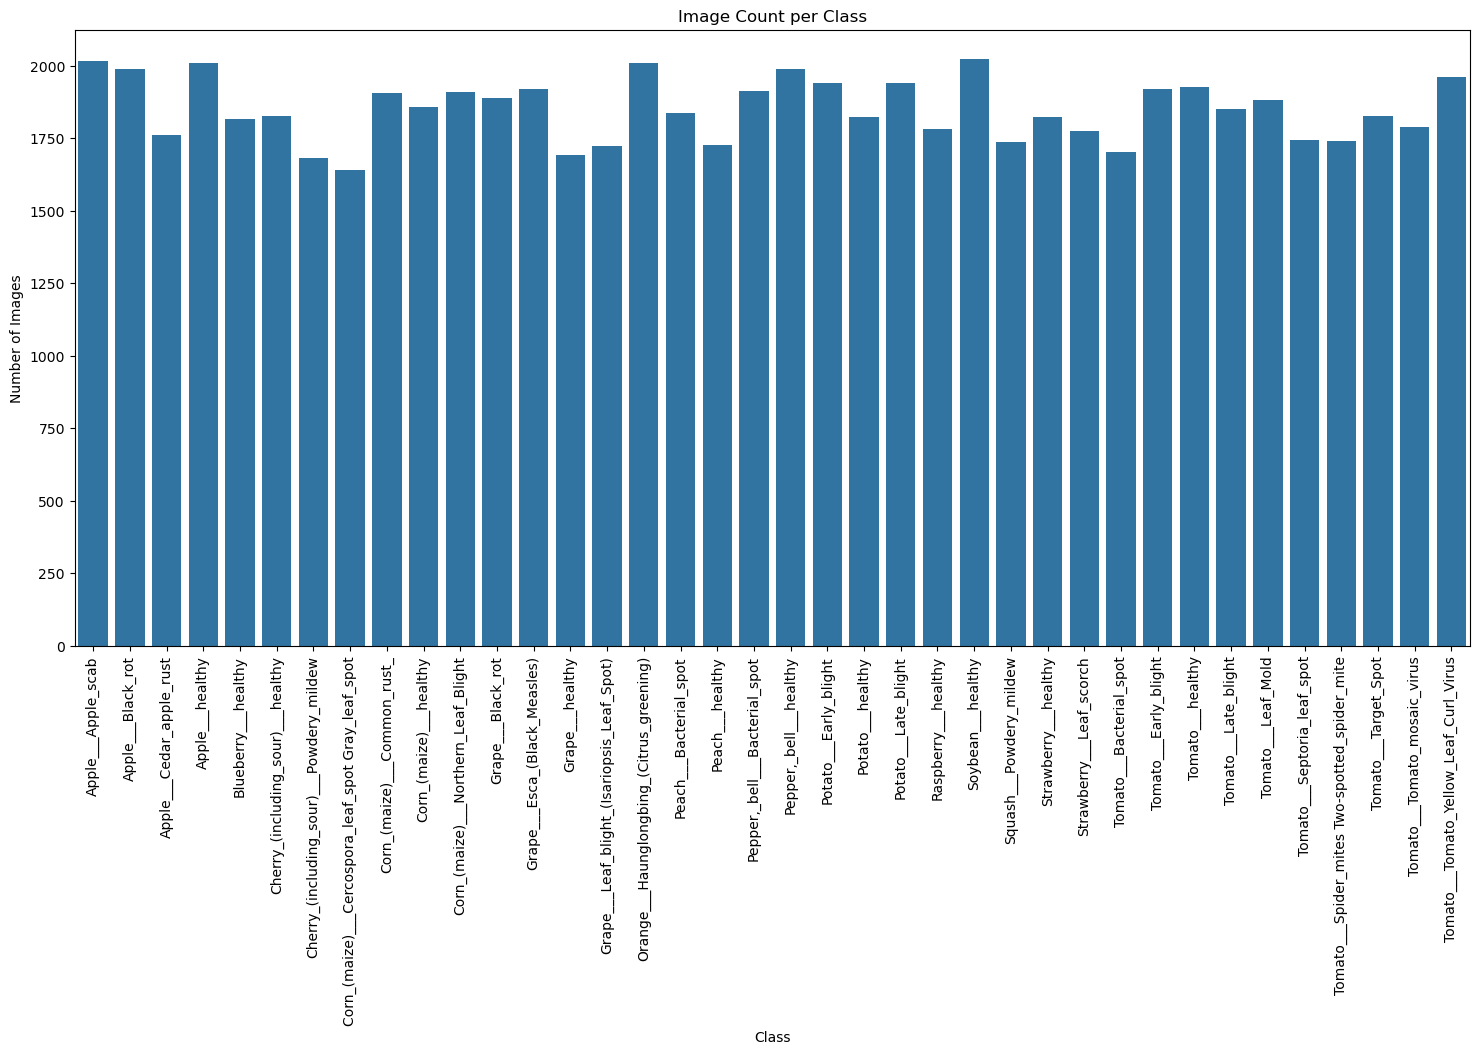

In [6]:
# creating dictionary
no_of_images = {}
for cls in train_classes:
    # taking absolute path for each class
    class_path = os.path.join(data_path_train,cls)
    # checking if inside the class we have images, if yes then count it
    if os.path.isdir(class_path):
        no_of_images[cls] = len(os.listdir(class_path))

# plotting
plt.figure(figsize=(18,8))
sns.barplot(x = list(no_of_images.keys()), y = list(no_of_images.values()))
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.show()

## Display Sample Images

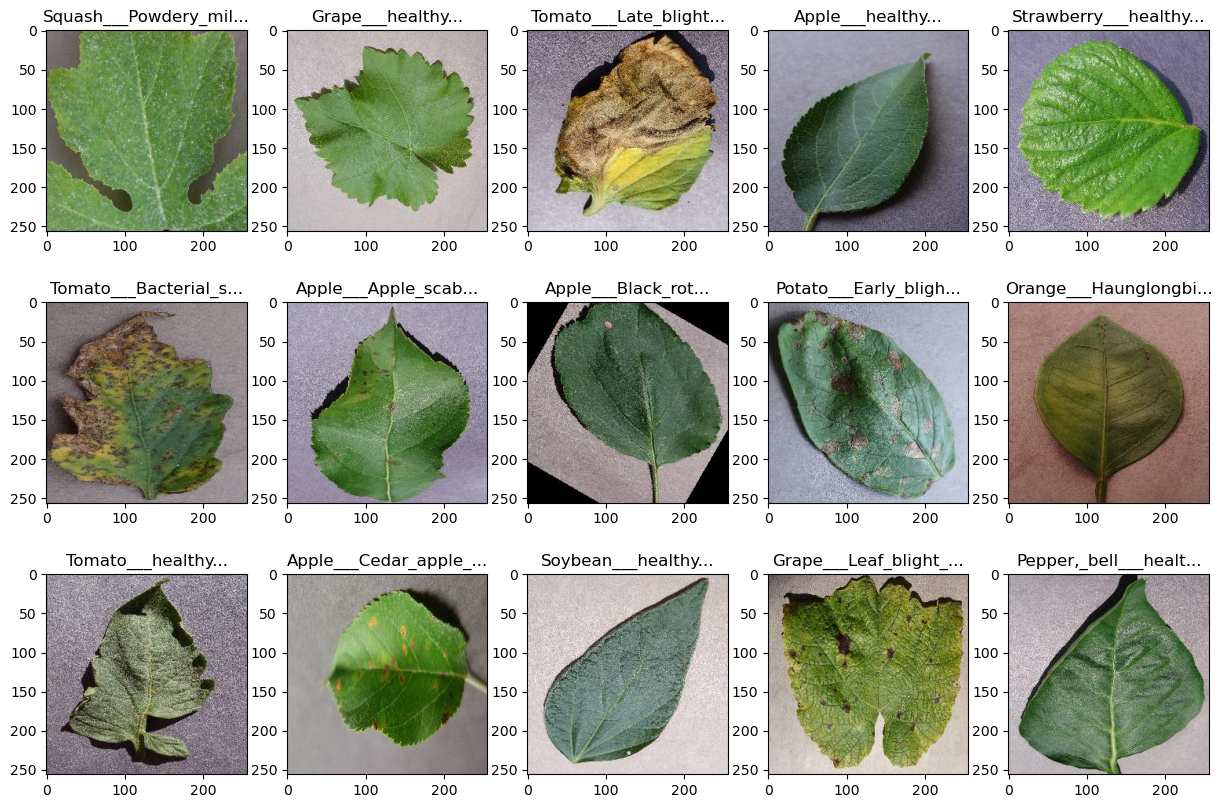

In [7]:
plt.figure(figsize=(15,10))
random_classes = random.sample(train_classes, 15)
i=0
for cls in random_classes:
    class_folder = os.path.join(data_path_train,cls)
    random_file = random.choice(os.listdir(class_folder))
    image_file = os.path.join(class_folder,random_file)
    img = Image.open(image_file)
    plt.subplot(3,5,i+1)
    plt.title(cls[:20]+"...")
    plt.imshow(img)
    i = i + 1
plt.show()

## Image Size & Format Check

In [8]:
size_counts = defaultdict(int)
format_counts = defaultdict(int)
total_images = 0
for cls in os.listdir(data_path_train):
    class_path = os.path.join(data_path_train,cls)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path,image)
        try:
            with Image.open(image_path) as img:
                size_counts[img.size] += 1
                format_counts[img.mode] += 1
                total_images += 1
        except Exception as e:
            print(f"Error occurred: {image_path} | {e}")

In [9]:
# Output results
print(f"Total images scanned: {total_images}")
print("Image Sizes Found:")
for size,count in size_counts.items():
    print(f"{size} -> {count} images")
print("Image Modes:")
for mode,count in format_counts.items():
    print(f"{mode} -> {count} images")

Total images scanned: 70295
Image Sizes Found:
(256, 256) -> 70295 images
Image Modes:
RGB -> 70295 images
